In [ ]:
# default_exp manipulate

# I2T2.manipulate

> Manipulate performs common image transformations such as cropping, padding and changing resolution.

In [ ]:
# hide
from nbdev.showdoc import *

In [ ]:
# export
from fastscript import call_parse, Param, bool_arg
from scipy import ndimage

import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pydicom

from I2T2.io import *
from I2T2.io import _get_tag_from_loaded_dicom

## Crop

In [ ]:
# export
def crop(image_array, final_dims_in_pixels, zero_fill_mode=False):
    """
    Crop image data to final_dim_in_pixels

    Attributes:
        image_array (float, np.array): 3D numpy array containing image data
        final_dim_in_pixels    (list): Final number of pixels in xyz dimensions. Example: [256, 256, 80]
        zero_fill_mode         (bool): If True, returns array filled with zeros

    Returns:
        cropped_image_array (arr): Resized array containing image data
    """

    dims = len(final_dims_in_pixels)
    original_dims_in_pixels = [image_array.shape[d]
                               for d in range(len(image_array.shape))]

    # test if input and output dimensions match
    if dims != len(original_dims_in_pixels):
        raise ValueError("Dimensions of the input (" + str(len(image_array.shape)) +
                         ") do not match those of output (" + str(len(final_dims_in_pixels)) + ")")

    # test if desired final image is smaller than original
    if any(final_dims_in_pixels[d] > original_dims_in_pixels[d] for d in range(dims)):
        raise ValueError(
            "Final dimensions are larger than original. Did you mean to `pad`?")

    cropped_image_array = np.zeros(image_array.shape)
    new_first_pixel = [0 for i in range(dims)]
    new_last_pixel = [0 for i in range(dims)]

    for dim in range(dims):
        new_first_pixel[dim] = int(math.floor(
            (original_dims_in_pixels[dim] - final_dims_in_pixels[dim]) / 2))
        new_last_pixel[dim] = new_first_pixel[dim] + final_dims_in_pixels[dim]

    # for 2D:
    if dims == 2:
        cropped_image_array = image_array[new_first_pixel[0]: new_last_pixel[0],
                                          new_first_pixel[1]: new_last_pixel[1]]
    elif dims == 3:
        cropped_image_array = image_array[new_first_pixel[0]: new_last_pixel[0],
                                          new_first_pixel[1]: new_last_pixel[1],
                                          new_first_pixel[2]: new_last_pixel[2]]
    if zero_fill_mode:
        cropped_image_array = cropped_image_array*0.

    return(cropped_image_array)

### Usage

`crop` takes an image array and crops the array according to the input dimensions.

See the example below:

In [ ]:
import pkg_resources

DATA_ROOT = pkg_resources.resource_filename('I2T2', 'data')

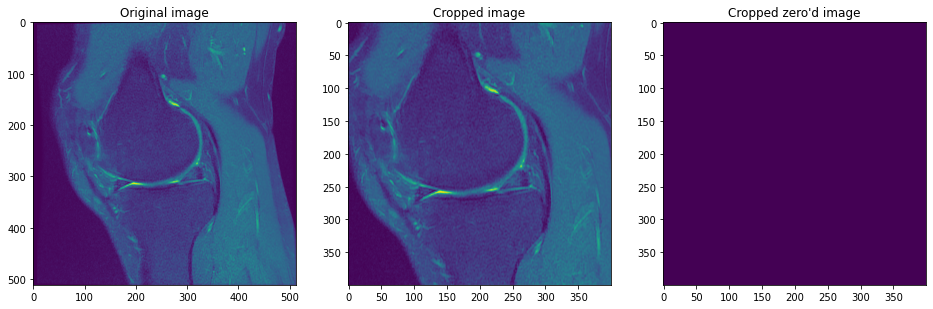

In [ ]:
# test
knee_data_path = os.path.join(DATA_ROOT,'knee')

dcm_df = dicom_dataframe(path_to_dicom_dir=knee_data_path, dicom_extension='dcm')
image_array = dcm_df.get_pixel_data()
cropped_image = crop(image_array=image_array,
                     final_dims_in_pixels=[400, 400, 22])
cropped_zero_image = crop(image_array=image_array, final_dims_in_pixels=[
                          400, 400, 22], zero_fill_mode=True)

# original image
plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.title('Original image')
plt.imshow(image_array[:, :, 6])

# cropped image
plt.subplot(132)
plt.title('Cropped image')
plt.imshow(cropped_image[:, :, 6])

# cropped image zero'd
plt.subplot(133)
plt.title("Cropped zero'd image")
plt.imshow(cropped_zero_image[:, :, 6])

plt.show()

## Pad

In [ ]:
# export
def pad(image_array, final_dims_in_pixels, zero_fill_mode=False):
    """
    Pad image data to final_dim_in_pixels

    Attributes:
        image_array (float, np.array): 3D numpy array containing image data
        final_dim_in_pixels    (list): Final number of pixels in xyz dimensions. Example: [256, 256, 80]
        zero_fill_mode         (bool): If True, returns array filled with zeros

    Returns:
        padded_image_array (arr): Resized array containing image data
    """

    dims = len(final_dims_in_pixels)
    original_dims_in_pixels = [image_array.shape[d]
                               for d in range(len(image_array.shape))]

    # test if input and output dimensions match
    if dims != len(original_dims_in_pixels):
        raise ValueError("Dimensions of the input (" + str(len(image_array.shape)) +
                         ") do not match those of output (" + str(len(final_dims_in_pixels)) + ")")

    # test if desired final image is larger than original
    if any(final_dims_in_pixels[d] < original_dims_in_pixels[d] for d in range(dims)):
        raise ValueError(
            "Final dimensions are smaller than original. Did you mean to `crop`?")

    padded_image_array = np.zeros(final_dims_in_pixels)
    new_first_image_pixel = [0 for i in range(dims)]
    new_last_image_pixel = [0 for i in range(dims)]

    for dim in range(dims):
        new_first_image_pixel[dim] = int(math.floor(
            (final_dims_in_pixels[dim] - original_dims_in_pixels[dim]) / 2))
        new_last_image_pixel[dim] = new_first_image_pixel[dim] + \
            original_dims_in_pixels[dim]

    # for 2D:
    if dims == 2:
        padded_image_array[new_first_image_pixel[0]: new_last_image_pixel[0],
                           new_first_image_pixel[1]: new_last_image_pixel[1]] = image_array
    elif dims == 3:
        padded_image_array[new_first_image_pixel[0]: new_last_image_pixel[0],
                           new_first_image_pixel[1]: new_last_image_pixel[1],
                           new_first_image_pixel[2]: new_last_image_pixel[2]] = image_array
    if zero_fill_mode:
        padded_image_array = padded_image_array*0.

    return(padded_image_array)

### Usage

`pad` takes an image array and crops the array according to the input dimensions.

See the example below:

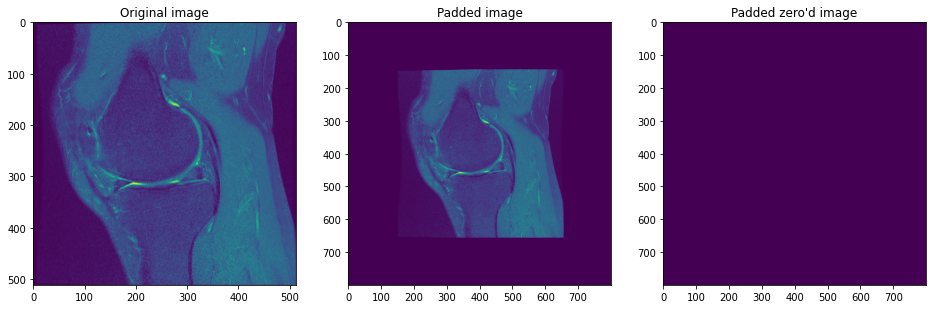

In [ ]:
dcm_df = dicom_dataframe(path_to_dicom_dir=knee_data_path, dicom_extension='dcm')

image_array = dcm_df.get_pixel_data()

padded_image = pad(image_array=image_array,
                   final_dims_in_pixels=[800, 800, 22])
padded_zero_image = pad(image_array=image_array, final_dims_in_pixels=[
                        800, 800, 22], zero_fill_mode=True)

# original image
plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.title('Original image')
plt.imshow(image_array[:, :, 6])

# padded image
plt.subplot(132)
plt.title('Padded image')
plt.imshow(padded_image[:, :, 6])

# padded image zero'd
plt.subplot(133)
plt.title("Padded zero'd image")
plt.imshow(padded_zero_image[:, :, 6])

plt.show()

## Resample

In [ ]:
# export
def resample(image_array, target_pixel_dims_list, is_seg=False):
    """
    Resamples `image` to new resolution according to a compression factor using scipy's `ndimage`

    Attributes:
        image_array (float, np.array) : Array of voxel values for image
        target_pixel_dims_list (list) : Dimensions of final image in pixels (e.g. [256, 256, 128])
        is_seg (bool)                 : Whether or not the image is a segmentation (i.e. pixel values are int)

    Returns:
        resampled_image_array (arr): Resampled array containing image data
    """
    # if dealing with segmentation images, do not interpolate
    # this is done by choosing interpolation order == 0
    order = 0 if is_seg == True else 3

    original_dims_in_pixels = [image_array.shape[d]
                               for d in range(len(image_array.shape))]
    compression_list = [target_pixel_dims_list[d] / original_dims_in_pixels[d]
                        for d in range(len(image_array.shape))]

    if (is_seg):
        resized_image = ndimage.interpolation.zoom(
            image_array, zoom=compression_list, order=order, cval=0)
        return resized_image
    else:
        resized_image = ndimage.interpolation.zoom(
            image_array, zoom=compression_list, order=order, cval=0)
        return resized_image

In [ ]:
# export
def resample_by(image_array, compression_factor_list, is_seg=False):
    """
    Resamples `image` to new resolution according to a compression factor using scipy's `ndimage`

    Attributes:
        image_array (float, np.array)  : Array of voxel values for image
        compression_factor_list (list) : Compression or expansion factor (e.g. [0.1, 10.0, 1.0])
        is_seg (bool)                  : Whether or not the image is a segmentation (i.e. pixel values are int)

    Returns:
        resampled_image_array (arr): Resampled array containing image data
    """
    original_dims_in_pixels = [image_array.shape[d]
                               for d in range(len(image_array.shape))]
    target_pixel_dims_list = [int(math.floor(compression_factor_list[d] * original_dims_in_pixels[d]))
                            for d in range(len(image_array.shape))]

    resized_image = resample(image_array, target_pixel_dims_list, is_seg)

    return(resized_image)

### Usage

`resample` takes an image array and resamples it to the dimensions given in `target_pixel_dims_list`.

`resample_by` is similar to resample but user gives a compression factor instead (e.g. [0.1,0.1,1.0] will resample the image to 10% in x and y directions)

See the examples below:

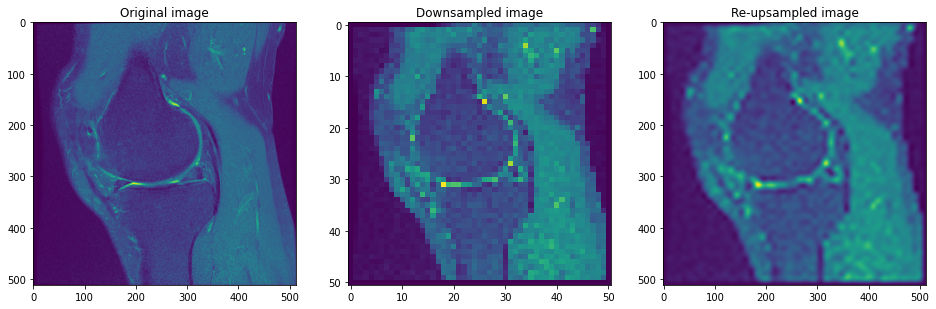

In [ ]:
dcm_df = dicom_dataframe(path_to_dicom_dir=knee_data_path, dicom_extension='dcm')

image_array = dcm_df.get_pixel_data()

downsampled_image = resample(image_array=image_array, target_pixel_dims_list=[
                             51, 51, 22], is_seg=False)

upsampled_image = resample(image_array=downsampled_image, target_pixel_dims_list=[
                           512, 512, 22], is_seg=False)

# Plot
plt.figure(figsize=(16, 16))

plt.subplot(131)
plt.title('Original image')
plt.imshow(image_array[:, :, 6])

plt.subplot(132)
plt.title('Downsampled image')
plt.imshow(downsampled_image[:, :, 6])

plt.subplot(133)
plt.title('Re-upsampled image')
plt.imshow(upsampled_image[:, :, 6])

plt.show()

Example of using `resample_by`:

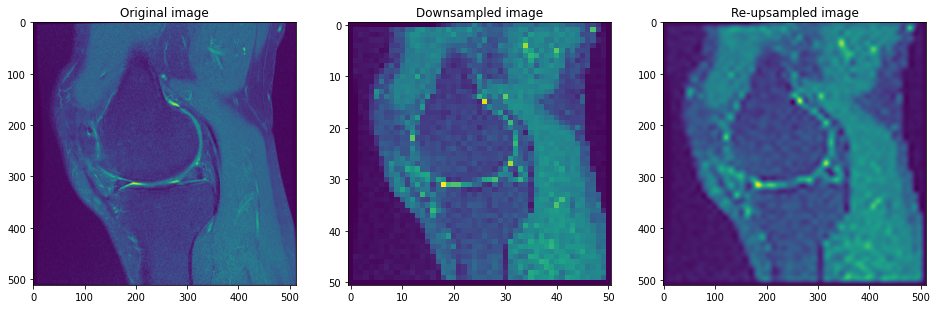

In [ ]:
dcm_df = dicom_dataframe(path_to_dicom_dir=knee_data_path, dicom_extension='dcm')

image_array = dcm_df.get_pixel_data()

downsampled_image = resample_by(image_array=image_array,
                                compression_factor_list=[0.1, 0.1, 1.0],
                                is_seg=False)

upsampled_image = resample_by(image_array=downsampled_image,
                              compression_factor_list=[10, 10, 1.0],
                              is_seg=False)

# Plot
plt.figure(figsize=(16, 16))

plt.subplot(131)
plt.title('Original image')
plt.imshow(image_array[:, :, 6])

plt.subplot(132)
plt.title('Downsampled image')
plt.imshow(downsampled_image[:, :, 6])

plt.subplot(133)
plt.title('Re-upsampled image')
plt.imshow(upsampled_image[:, :, 6])

plt.show()

#### Resampling example:
Resampling segmentation to agree with original image

In [ ]:
# read data
segmentation_path = os.path.join(DATA_ROOT,'knee-segmentation','knee_segmentation.h5')

dcm_df = dicom_dataframe(path_to_dicom_dir=knee_data_path, dicom_extension='dcm')

image_array = dcm_df.get_pixel_data()
knee_segmentation = load_h5(segmentation_path)
knee_segmentation = knee_segmentation.get('seg')

print('Knee segmentation dims:', knee_segmentation.shape)
print('Knee original dims:', image_array.shape)

Knee segmentation dims: (280, 280, 160)
Knee original dims: (512, 512, 22)


In [ ]:
# resample to desired shape
resampled_segmentation = resample(image_array=knee_segmentation,
                                  target_pixel_dims_list=(512, 512, 22),
                                  is_seg=True)

print('Knee segmentation dims after resampling:', resampled_segmentation.shape)

Knee segmentation dims after resampling: (512, 512, 22)


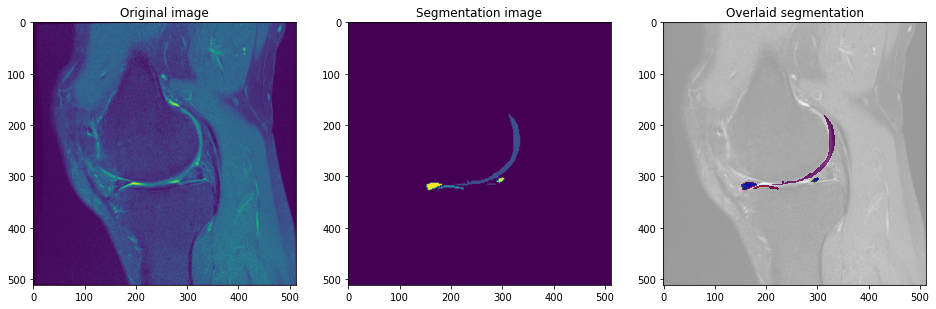

In [ ]:
# Plot
from matplotlib.colors import ListedColormap
plt.figure(figsize=(16, 16))

plt.subplot(131)
plt.title('Original image')
plt.imshow(image_array[:, :, 6])

plt.subplot(132)
plt.title('Segmentation image')
plt.imshow(resampled_segmentation[:, :, 6])

colors = ['white', 'purple', 'red', 'green', 'blue']
cmap = ListedColormap(colors)

plt.subplot(133)
plt.title('Overlaid segmentation')
# I would add interpolation='none'
plt.imshow(image_array[:, :, 6], cmap='gray')
plt.imshow(resampled_segmentation[:, :, 6], cmap=cmap,
           vmin=0, vmax=4, alpha=0.6)  # interpolation='none'

plt.show()

## Resize

In [ ]:
#export
def resize(image_array, original_pixel_spacing_list, target_field_of_view_list=[140,140,80], 
           target_pixel_spacing_list=[0.5,0.5,0.5], is_seg=False):
    """
    Resizes `image_array` to desired field of view by first resampling and then cropping / padding.
    The returned resampled image has isotropic pixel spacing = 0.5mm

    Args:
        image_array: np.array of voxel values
        pixel_spacing_list: list of pixel spacing values prior to resizing in mm
        target_field_of_view_list: list of field of values in mm (default: 140, 140, 80)
        target_pixel_spacing_list: list of pixel spacing values after resizing in mm (default: 0.5, 0.5, 0.5)
        is_seg (bool): whether image_array is a segmentation or not (default: False)

    Returns:
        image_cropped_resampled: np.array with voxels values after cropping and re-sampling

    """
    import math
    
    num_dim = len(image_array.shape)
    compression_factor_list = [original_pixel_spacing_list[i]/target_pixel_spacing_list[i] for i in range(num_dim)]
    image_resampled = resample_by(image_array=image_array, compression_factor_list= compression_factor_list)  
    current_dim_in_pixels_list = list(image_resampled.shape)
    target_dim_in_pixels_list = [int(target_field_of_view_list[i]/target_pixel_spacing_list[i]) for i in range(num_dim)]
      
    #pad or crop in xy (while ignoring z)
    if current_dim_in_pixels_list[0] >= target_dim_in_pixels_list[0]:
        print('Cropping image in xy')
        image_resampled_cropped = crop(image_array=image_resampled,
                                       final_dims_in_pixels=[target_dim_in_pixels_list[0],
                                                             target_dim_in_pixels_list[1],
                                                             current_dim_in_pixels_list[2]])
    else:
        print('Padding image in xy')
        image_resampled_cropped = pad(image_array=image_resampled,
                                      final_dims_in_pixels=[target_dim_in_pixels_list[0],
                                                            target_dim_in_pixels_list[1],
                                                            current_dim_in_pixels_list[2]])

    #pad or crop in z (while ignoring xy)
    current_dim_in_pixels_list = list(image_resampled_cropped.shape)

    if current_dim_in_pixels_list[2] >= target_dim_in_pixels_list[2]:
        print('Cropping image in z')
        image_resampled_cropped = crop(image_array=image_resampled_cropped,
                                       final_dims_in_pixels=[current_dim_in_pixels_list[0],
                                                             current_dim_in_pixels_list[1],
                                                             target_dim_in_pixels_list[2]])
    else:
        print('Padding image in z')
        image_resampled_cropped = pad(image_array=image_resampled_cropped,
                                      final_dims_in_pixels=[current_dim_in_pixels_list[0],
                                                            current_dim_in_pixels_list[1],
                                                            target_dim_in_pixels_list[2]])
    
    return(image_resampled_cropped)

### Resizing image

In [ ]:
# read data
dcm_df = dicom_dataframe(path_to_dicom_dir=knee_data_path, dicom_extension='dcm')

image_array = dcm_df.get_pixel_data()
knee = load_h5(segmentation_path)
knee_image = knee.get('img')
knee_segmentation = knee.get('seg')

print('Knee segmentation dims:', knee_segmentation.shape)
print('Knee resampled dims:', knee_image.shape)
print('Knee original dims:', image_array.shape)

Knee segmentation dims: (280, 280, 160)
Knee resampled dims: (280, 280, 160)
Knee original dims: (512, 512, 22)


In [ ]:
xres, yres = _get_tag_from_loaded_dicom(dcm_df.dataframe['DS'].loc[0], 'PixelSpacing')
zres = _get_tag_from_loaded_dicom(dcm_df.dataframe['DS'].loc[0], 'SpacingBetweenSlices')
xres, yres, zres = float(xres), float(yres), float(zres)
resized_image = resize(image_array=image_array, original_pixel_spacing_list=[xres, yres, zres], target_pixel_spacing_list=[0.5, 0.5, 0.5])

Cropping image in xy
Cropping image in z


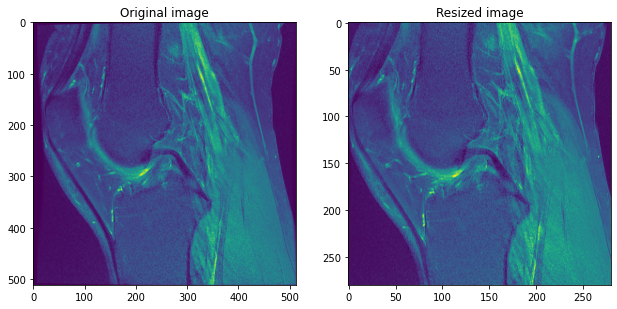

In [ ]:
# Plot
from matplotlib.colors import ListedColormap
plt.figure(figsize=(16, 16))

plt.subplot(131)
plt.title('Original image')
plt.imshow(image_array[:,:,10])

plt.subplot(132)
plt.title('Resized image')
plt.imshow(resized_image[:,:,72])

colors = ['white', 'purple', 'red', 'green', 'blue']
cmap = ListedColormap(colors)

plt.show()